In [63]:
#importing libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [64]:
ad = gpd.read_file('AssemblyDistricts.geojson')

In [65]:
ad.shape

(80, 8)

In [66]:
ad.sample(3)

,OBJECTID,GEOID,AssemblyDistrictName,AssemblyDistrictLabel,AssemblyAreaSqMi,SHAPE_Length,SHAPE_Area,geometry
51,52,52,Assembly District 52,AD 52,44.231398,0.813220,0.011191,"MULTIPOLYGON (((-118.18380 34.14908, -118.1838..."
1,2,02,Assembly District 02,AD 02,12489.087048,17.058325,3.423411,"MULTIPOLYGON (((-124.22308 40.68537, -124.2248..."
49,50,50,Assembly District 50,AD 50,119.340751,1.612652,0.030190,"MULTIPOLYGON (((-117.45360 34.17126, -117.4536..."


In [67]:
ad.columns = ['Object_ID',
              'GEOID', 
              'Assembly_District',
              'AssemblyDistrict',
              'Assembly_District_Area',
              'Shape_Length',
              'Shape_Area',
                'geometry']

In [68]:
ad.head(3)

,Object_ID,GEOID,Assembly_District,AssemblyDistrict,Assembly_District_Area,Shape_Length,Shape_Area,geometry
0,1,01,Assembly District 01,AD 01,27276.059876,21.604569,7.523587,"MULTIPOLYGON (((-119.58545 38.71322, -119.5849..."
1,2,02,Assembly District 02,AD 02,12489.087048,17.058325,3.423411,"MULTIPOLYGON (((-124.22308 40.68537, -124.2248..."
2,3,03,Assembly District 03,AD 03,7390.839402,9.623255,2.011283,"MULTIPOLYGON (((-121.21744 39.01248, -121.2174..."


In [69]:
ad = ad[['AssemblyDistrict',
              'Assembly_District_Area',
              'Shape_Length',
              'Shape_Area',
                'geometry']]
ad.head(3)

,AssemblyDistrict,Assembly_District_Area,Shape_Length,Shape_Area,geometry
0,AD 01,27276.059876,21.604569,7.523587,"MULTIPOLYGON (((-119.58545 38.71322, -119.5849..."
1,AD 02,12489.087048,17.058325,3.423411,"MULTIPOLYGON (((-124.22308 40.68537, -124.2248..."
2,AD 03,7390.839402,9.623255,2.011283,"MULTIPOLYGON (((-121.21744 39.01248, -121.2174..."


In [70]:
info = gpd.read_file('AssemblyDataCPA.csv')

In [71]:
info.head(3)

,AssemblyDistrict,Assemblymember,CPA_Communities,Customer_Count,geometry
0,AD 34,Tom Lackey,Los Angeles County,79070,None
1,AD 38,Steve Bennett,"Camarillo, Ojai, Oxnard, Santa Paula, City of ...",417004,None
2,AD 39,Juan Carrillo,Los Angeles County,50495,None


In [72]:
info = info[['AssemblyDistrict',
              'Assemblymember',
              'CPA_Communities',
                'Customer_Count']]
info.head(3)

,AssemblyDistrict,Assemblymember,CPA_Communities,Customer_Count
0,AD 34,Tom Lackey,Los Angeles County,79070
1,AD 38,Steve Bennett,"Camarillo, Ojai, Oxnard, Santa Paula, City of ...",417004
2,AD 39,Juan Carrillo,Los Angeles County,50495


In [73]:
ca=ad.merge(info,on="AssemblyDistrict")

In [74]:
ca.sample(3)

,AssemblyDistrict,Assembly_District_Area,Shape_Length,Shape_Area,geometry,Assemblymember,CPA_Communities,Customer_Count
3,AD 40,390.238012,2.448628,0.099072,"MULTIPOLYGON (((-118.18970 34.38072, -118.1897...",Pilar Schiavo,Los Angeles County,108283
5,AD 42,542.202103,2.376959,0.137305,"MULTIPOLYGON (((-118.67061 34.36070, -118.6702...",Jacqui Irwin,"Agoura Hills, Calabasas, Los Angeles County, M...",409861
0,AD 34,18322.135823,14.898303,4.682776,"MULTIPOLYGON (((-114.94816 35.25525, -114.9482...",Tom Lackey,Los Angeles County,79070


In [75]:
ca.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   AssemblyDistrict        25 non-null     object  
 1   Assembly_District_Area  25 non-null     float64 
 2   Shape_Length            25 non-null     float64 
 3   Shape_Area              25 non-null     float64 
 4   geometry                25 non-null     geometry
 5   Assemblymember          25 non-null     object  
 6   CPA_Communities         25 non-null     object  
 7   Customer_Count          25 non-null     object  
dtypes: float64(3), geometry(1), object(4)
memory usage: 1.7+ KB


In [76]:
ca['Customer_Count'] = ca['Customer_Count'].astype(float)
ca.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   AssemblyDistrict        25 non-null     object  
 1   Assembly_District_Area  25 non-null     float64 
 2   Shape_Length            25 non-null     float64 
 3   Shape_Area              25 non-null     float64 
 4   geometry                25 non-null     geometry
 5   Assemblymember          25 non-null     object  
 6   CPA_Communities         25 non-null     object  
 7   Customer_Count          25 non-null     float64 
dtypes: float64(4), geometry(1), object(3)
memory usage: 1.7+ KB


In [77]:
ca = ca[['AssemblyDistrict',
         'geometry',
              'Assemblymember',
              'CPA_Communities',
                'Customer_Count']]
ca.columns = ['Assembly_District',
         'geometry',
              'Assemblymember',
              'CPA_Communities',
                'Customer_Count']
ca.head(3)

,Assembly_District,geometry,Assemblymember,CPA_Communities,Customer_Count
0,AD 34,"MULTIPOLYGON (((-114.94816 35.25525, -114.9482...",Tom Lackey,Los Angeles County,79070.0
1,AD 38,"MULTIPOLYGON (((-118.88042 34.78866, -118.8803...",Steve Bennett,"Camarillo, Ojai, Oxnard, Santa Paula, City of ...",417004.0
2,AD 39,"MULTIPOLYGON (((-117.35516 34.39772, -117.3552...",Juan Carrillo,Los Angeles County,50495.0


In [78]:
# importing 
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CA Assembly Districts with CPA Customers')

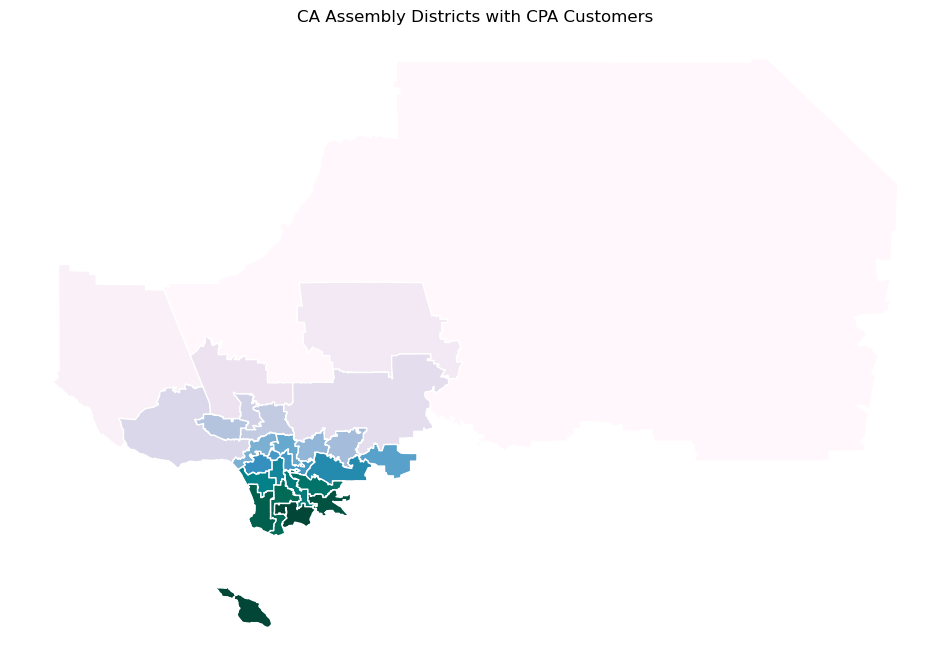

In [80]:
# Making another non-interactive figure with axis turned off and a new title at the top
fig, ax = plt.subplots(figsize = (12,10)) 
ca.plot(column = 'Assembly_District',legend=False,
  edgecolor='white',cmap = 'PuBuGn',ax=ax)
ax.axis('off')
plt.title('CA Assembly Districts with CPA Customers')

In [83]:
# making the interactive map a bit prettier and easier to understand, complete with a legend
c = ca.explore(
     column="Customer_Count", # make choropleth based on this column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="PuBuGn", # use "PuBuGn" matplotlib colormap
     style_kwds=dict(color="grey", weight=".4", fillOpacity=".8"), # use white outline
     zoom_start="7.5"
    )
c

In [84]:
c.save('CPA_AssemblyDistricts.html')